In [1]:
# %matplotlib ipympl
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import glob
from astropy.io import fits
from mpl_interactions import ipyplot as iplt
# from pyds9plugin.DS9Utils import fitswrite
import numpy as np
from astropy.table import Table
# from google.colab import output
# output.enable_custom_widget_manager()
im = Table.read("/Users/Vincent/DS9QuickLookPlugIn/subsets/240330_12H03m27/Directory_LAB_DRIVE/PSF_catalogs.fits")#[0]#.data
# A,B,C = np.loadtxt("/content/gdrive/MyDrive/FIREBall-2/FB2_2023/GOBC_data/230617_sky_test/coma_minmization/ABC_TTF.txt").T
im = im[[(im["VIGNET"][i]>=-1e29).all() for i in range(len(im))]]
def f(param1):
    return im["VIGNET"][param1]-np.max(im["VIGNET"][param1])

fig, ax = plt.subplots()
controls = iplt.imshow(f, param1=np.arange(0, len(im)))
plt.colorbar()
def xlabel_func(param1):
    # param1=int(param1)
    # return f"A=%0.1f, A=%0.1f, A=%0.1f"%(A[param1],B[param1],C[param1])
    return f"im=%i, x=%i,y=%i"%(im["image"][param1],im["X_IMAGE"][param1],im["Y_IMAGE"][param1])
with controls["param1"]:
    iplt.title(xlabel_func)




ModuleNotFoundError: No module named 'mpl_interactions'

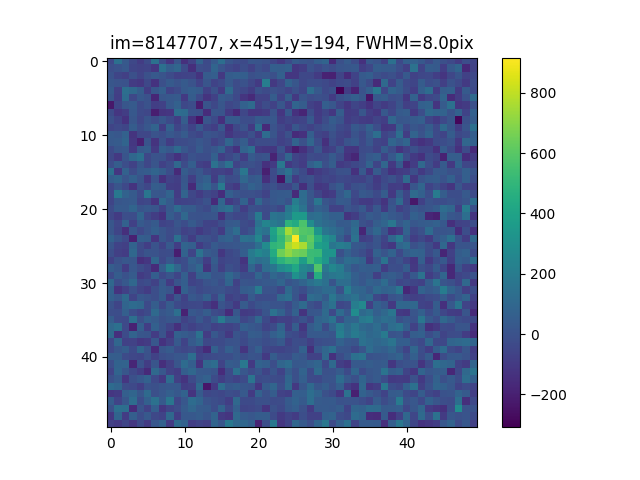

In [2]:

def f(param1,param2):
    dist = np.sqrt((im["X_IMAGE"]-param1)**2+(im["Y_IMAGE"]-param2)**2)
    return im["VIGNET"][np.argmin(dist)]

fig, ax = plt.subplots()
controls = iplt.imshow(f, param1=np.arange(0, 1000), param2=np.arange(0, 1200))
plt.colorbar()
def xlabel_func(param1,param2):
    dist = np.sqrt((im["X_IMAGE"]-param1)**2+(im["Y_IMAGE"]-param2)**2)
    val = np.argmin(dist)
    # param1=int(param1)
    # return f"A=%0.1f, A=%0.1f, A=%0.1f"%(A[param1],B[param1],C[param1])
    return f"im=%i, x=%i,y=%i, FWHM=%0.1fpix"%(im["image"][val],im["X_IMAGE"][val],im["Y_IMAGE"][val],im["FWHM_IMAGE"][val])
with controls["param1","param2"]:
    iplt.title(xlabel_func)

False

In [27]:
im["VIGNET"][0]

array([[ 2.64815430e+02,  8.56015625e+01,  1.89403320e+02, ...,
         3.21037109e+02,  2.90115479e+02,  2.04165527e+02],
       [ 1.53340820e+02,  2.85212891e+02,  1.25099854e+02, ...,
         3.23334717e+02,  2.93387207e+02,  1.79409180e+02],
       [ 3.24925293e+02,  1.92883301e+02,  3.22854492e+02, ...,
         3.66668945e+02,  3.08694824e+02,  2.93688965e+02],
       ...,
       [ 5.07888184e+01,  1.22333984e+02,  3.82869385e+02, ...,
        -1.00000002e+30, -1.00000002e+30, -1.00000002e+30],
       [ 3.17632324e+02,  2.49145020e+02,  2.01647461e+02, ...,
        -1.00000002e+30,  3.12312012e+02, -1.00000002e+30],
       [ 1.38504395e+02,  3.51981934e+02,  2.23449707e+02, ...,
        -1.00000002e+30, -1.00000002e+30, -1.00000002e+30]], dtype=float32)

In [5]:
import pandas as pd

# Define the column names
columns = ['time', 'DOBC[C]', 'Getter[C]', 'CuClamp2[C]', 'EMCCDBack[C]', 'Coldhead[C]', 'Reject[C]']

# Define the file path
file_path = "/Volumes/PICOUETKEY/240422/alltemps.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path,  on_bad_lines='skip')

# Filter out rows with incorrect number of columns
# corrected_df = df[df.apply(lambda row: len(row) == len(columns), axis=1)]

# Write the corrected DataFrame back to a CSV file
corrected_df.to_csv("/Volumes/PICOUETKEY/240422/alltemps_corrected.csv", index=False)

/var/folders/m8/f6l41h_51qxdzrz8p1xqr3f80000gp/T/ipykernel_56562/3347328762.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.semilogy(a["TEMPB"],12.97*3600*a["BottomImage"]/a["EXPTIME"],":o",label="No amplification")


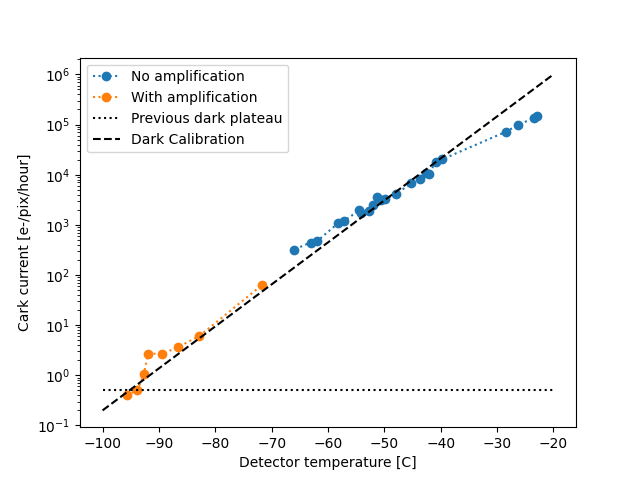

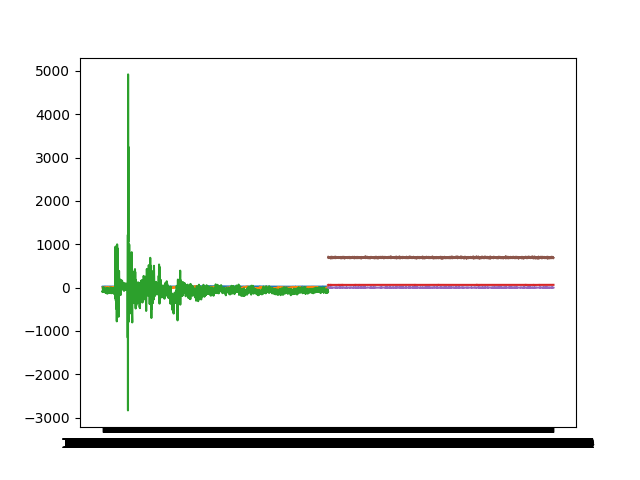

In [17]:
import pandas as pd

i=159000

plt.figure()
for f in glob.glob("/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/dataLog0012*.csv"):
    a = Table.read(f).to_pandas()
    a['time'] = pd.to_datetime(a['rtcTime'], format='%H:%M:%S.%f')
    plt.plot(a["rtcTime"][i:i+2000],a["mZ"][i:i+2000],label="m")
    plt.plot(a["rtcTime"][i:i+2000],a["gZ"][i:i+2000],label="g")
    plt.plot(a["rtcTime"][i:i+2000],a["aZ"][i:i+2000],label="z")
plt.show()




In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "rtcTime": ["18:00:16.25", "18:01:16.25", "18:02:16.25", "18:03:16.25", "18:04:16.25"],
    "value": [10, 15, 20, 18, 25]
}

# Convert time string to datetime

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['rtcTime'], df['value'], marker='o')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Data vs Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


rtcDate,rtcTime,aX,aY,aZ,gX,gY,gZ,mX,mY,mZ,imu_degC,output_Hz,col13
str10,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
01/02/2000,18:00:16.25,12.7,1000.0,-115.23,0.12,-2.32,-1.46,-5.25,3.9,65.55,0.67,90.832,--
01/02/2000,18:00:16.27,-11.23,999.51,-101.07,1.16,-1.16,0.18,-5.1,2.55,64.65,1.1,90.832,--
01/02/2000,18:00:16.28,-31.25,1002.93,-79.59,-0.06,-0.79,0.06,-4.95,2.7,64.8,1.0,90.832,--
01/02/2000,18:00:16.29,13.67,994.14,-90.82,2.13,-1.65,3.17,-6.15,3.45,66.3,1.1,90.832,--
01/02/2000,18:00:16.30,29.3,985.35,-120.61,0.61,-3.29,-0.12,-6.15,3.45,64.5,1.0,90.832,--
01/02/2000,18:00:16.32,38.09,993.16,-88.38,0.18,-1.77,-0.67,-4.2,2.7,65.25,1.14,90.832,--
01/02/2000,18:00:16.33,20.51,1000.0,-101.56,0.79,-3.17,2.5,-5.55,3.75,64.65,0.76,90.832,--
01/02/2000,18:00:16.34,-12.7,1011.23,-91.8,1.28,0.79,-1.83,-5.1,3.3,64.2,0.62,90.832,--
01/02/2000,18:00:16.35,-29.3,1005.37,-30.76,0.37,-1.89,-1.16,-4.35,4.05,63.9,0.81,90.832,--
